In [19]:
import numpy as np
from numpy import linspace, loadtxt, ones, convolve
import pandas as pd
#import pickle
from textblob import TextBlob
import matplotlib.pyplot as plt
import matplotlib.lines as ln
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, drange , date2num
import json
import os
import nltk
from nltk import RegexpTokenizer
#from collections import Counter
import re
from datetime import datetime
import time
from scipy.signal import savgol_filter
#import string

In [3]:
#!/usr/bin/python3 -m pip install tsmoothie

In [4]:
global_path = '~/Desktop/Datasets/art/art_writing'
path = 'artnet_articles'
#path = 'artnet_articles'
#path = 'artnet_articles'
folderpath = os.path.expanduser(os.path.join(global_path, path))

filelist = os.listdir(folderpath)

In [39]:
data = {}
data = pd.DataFrame(data)

cleaned_titles = []
cleaned_paras = []
brought_in = 0

for file in filelist: #[:100]:
    filepath = os.path.join(folderpath, file)
    f = open(filepath) #, encoding='ascii', errors='ignore')
    try:
        j_import = json.load(f)
        j_import = j_import[0]
        #print(j_import)
        #title = j_import['title']
        try:
            para = j_import['para']
            para = para[0]
            tokenizer = RegexpTokenizer(r'\w+')
            tokens = tokenizer.tokenize(para)
            #print(tokens)
            count = len(tokens)
            if count > 1000 and brought_in < 3000:
                brought_in += 1
                para = para.replace("	", "").replace("Follow  on Facebook:", '').replace("\n", ' ')
                para = para.replace("\r" , " ")
                para = para.strip()
                #print(para)

                title = j_import['title']
                title = title.replace("	", "").replace("\n", ' ')
                title = title.replace("\r" , " ")
                title = title.strip()

                author = j_import['author']
                author = author.replace("	", "").replace("\n", ' ')
                author = author.replace("\r" , " ")
                author = author.strip()

                pubtime_i = j_import['pubtime']
                pubtime_i = pubtime_i[:19]

                pubtime = datetime(*time.strptime(pubtime_i, "%Y-%m-%dT%H:%M:%S")[:6])

                new_row = {"title" : title , "para" : para , "author": author ,
                           "pubtime" : pubtime }
                data = data.append(new_row, ignore_index=True)
                f.close()
            else:
                pass

        except KeyError:
            f.close()
            pass

    except json.decoder.JSONDecodeError:
        f.close()
        pass

#data = data.set_index('title')
data

,author,para,pubtime,title
0,Artnet News,Art Industry News is a daily digest of the mos...,2019-03-20 13:16:19,Art Industry News: Obama Portraitist Kehinde W...
1,Caroline Goldstein,In another installment of our series investiga...,2019-11-08 17:18:05,"See the Poetic, Heartbreaking Final Paintings ..."
2,Brian Boucher,"As museum acquisitions grow, and amid a balloo...",2016-08-12 15:21:58,"From Auschwitz Drawings to Teddy Bears, ‘The K..."
3,Vivienne Chow,"On June 30, the eve of the 23rd anniversary of...",2020-07-16 12:59:43,Beijing Is Clamping Down on ‘Subversive’ Activ...
4,Taylor Dafoe,"A year ago, artist Allison Zuckerman was 26, f...",2017-12-05 14:14:32,Behind Artist Allison Zuckerman’s Rapid Rise F...
...,...,...,...,...
2995,Ben Davis,"It’s Saturday night in Dallas, at the debut of...",2015-01-23 12:37:07,Loris Gréaud Smashes the Mold for Museum Shows
2996,Artnet News,Art Industry News is normally a daily digest o...,2019-08-06 12:10:01,Art Industry News: Collectors Will Send an Art...
2997,Artnet News,Art Industry News is a daily digest of the mos...,2019-02-19 14:20:53,Art Industry News: Elusive Icon Jasper Johns O...
2998,Hili Perlson,It is a remarkable feat when a small biennial—...,2017-09-05 18:27:10,"Peak Oil, Eco-Futurism, and Cyborg Philosopher..."


In [40]:
#polarity ananlysis of paras
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['para'].apply(pol)
data['subjectivity'] = data['para'].apply(sub)
data

,author,para,pubtime,title,polarity,subjectivity
0,Artnet News,Art Industry News is a daily digest of the mos...,2019-03-20 13:16:19,Art Industry News: Obama Portraitist Kehinde W...,0.054726,0.401017
1,Caroline Goldstein,In another installment of our series investiga...,2019-11-08 17:18:05,"See the Poetic, Heartbreaking Final Paintings ...",0.031590,0.373545
2,Brian Boucher,"As museum acquisitions grow, and amid a balloo...",2016-08-12 15:21:58,"From Auschwitz Drawings to Teddy Bears, ‘The K...",0.105503,0.550281
3,Vivienne Chow,"On June 30, the eve of the 23rd anniversary of...",2020-07-16 12:59:43,Beijing Is Clamping Down on ‘Subversive’ Activ...,0.125655,0.373245
4,Taylor Dafoe,"A year ago, artist Allison Zuckerman was 26, f...",2017-12-05 14:14:32,Behind Artist Allison Zuckerman’s Rapid Rise F...,0.142478,0.415025
...,...,...,...,...,...,...
2995,Ben Davis,"It’s Saturday night in Dallas, at the debut of...",2015-01-23 12:37:07,Loris Gréaud Smashes the Mold for Museum Shows,0.105234,0.414582
2996,Artnet News,Art Industry News is normally a daily digest o...,2019-08-06 12:10:01,Art Industry News: Collectors Will Send an Art...,0.134207,0.378989
2997,Artnet News,Art Industry News is a daily digest of the mos...,2019-02-19 14:20:53,Art Industry News: Elusive Icon Jasper Johns O...,0.099831,0.480798
2998,Hili Perlson,It is a remarkable feat when a small biennial—...,2017-09-05 18:27:10,"Peak Oil, Eco-Futurism, and Cyborg Philosopher...",0.045459,0.386747


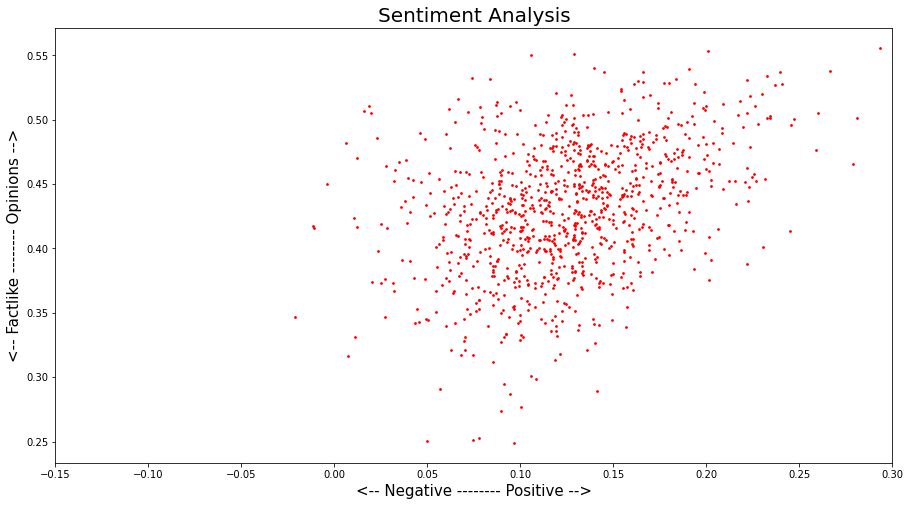

In [199]:
# Let's plot the results
plt.rcParams['figure.figsize'] = [15, 8]

for index, para in enumerate(data.index):
    x = data.polarity.loc[para]
    y = data.subjectivity.loc[para]
    #ln.Line2D(xdata=[0,0] , ydata =[0,1.0] , linewidth=1 , color="black")
    plt.scatter(x, y, color='red', s=3)
    
    #plt.text(x+.001, y+.001, data['author'][index], fontsize=5)
    plt.xlim(-.15, .3) 

    

  
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Factlike -------- Opinions -->', fontsize=15)

plt.show()

In [41]:
data.sort_values(by=['pubtime'], inplace=True )
data

,author,para,pubtime,title,polarity,subjectivity
840,Deanie Hoxter,By using art to reflect on personal history an...,2013-04-10 17:11:16,"Gallery Hopping on Thursdays: April 11, 2013",0.140540,0.376828
1268,Audrey Fair,Dong Kingman Paris Scene with Eiffel Tower Kod...,2013-04-15 21:17:40,French Contemporary Art Glossary and Museum List,0.091262,0.245588
321,Katherine Markley,"On February 6, Berthe Morisot ’s 1881 painting...",2013-04-29 19:46:09,Once Again… Where Are All the Women Artists?,0.122439,0.343434
967,Cyril Bourlier,"Le Calin Catalan In 1907, he started business ...",2013-06-12 18:05:47,An Introduction to Joan Miró,0.126468,0.469915
1198,Aaron R. Cahn,This essay is about a common provision in cont...,2013-06-26 16:05:50,Art Law on Legal Title and Buying Art,0.152145,0.412758
...,...,...,...,...,...,...
280,Katie White,After the strange collective experience that w...,2021-02-10 06:30:19,What’s in Store for the Art World in 2021? We ...,0.199745,0.481525
2459,Naomi Rea Eileen Kinsella,"In recent years, the public has increasingly s...",2021-02-11 07:00:39,As Museums Desperately Try to Diversify Their ...,0.094360,0.329847
1763,Nate Freeman,"Every week, Artnet News brings you Wet Paint, ...",2021-02-12 06:30:18,Wet Paint: Artist Ryder Ripps and Azealia Bank...,0.117017,0.408531
422,Noor Brara,Fine watchmaking and the arts have a long para...,2021-02-12 15:00:28,‘We’re Always Looking for Different Perspectiv...,0.222857,0.448090


In [42]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


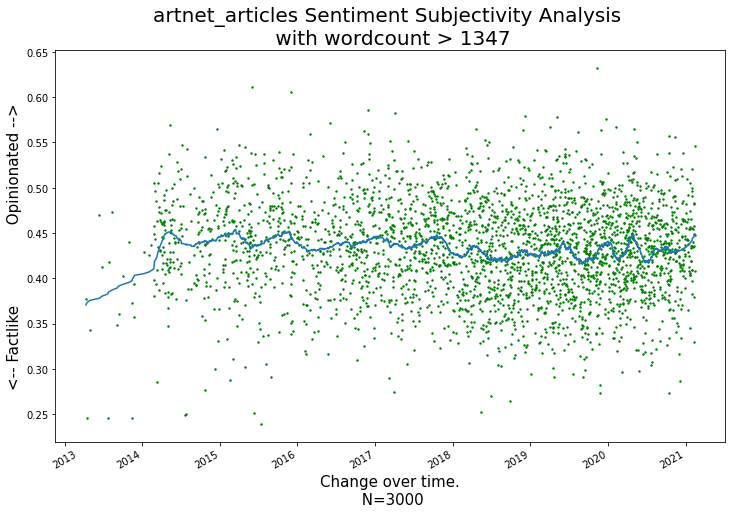

In [43]:
#time plot polarity
plt.rcParams['figure.figsize'] = [12, 8]

fig, ax = plt.subplots()
xs, ys , yhats = [] , [] , []

for index, para in enumerate(data.index):
    #pubdate_c = plt_dates.date2num(pubtime)
    xinput = data.pubtime.loc[para]
    x = date2num(xinput)
    xs.append(x)
    y = data.subjectivity.loc[para]
    ys.append(y)
    #yhat = movingaverage(index, 10)
    #yhats.append(yhat)
    #print([y, yhat])

#print(yhats)
yhat = savgol_filter(ys, 201, 3)
yhat = list(yhat)
#print(yhat)

sample = len(ys)
ax.set_title(f'{path} Sentiment Subjectivity Analysis \n with wordcount > {count}', fontsize=20)
ax.set_xlabel(f'Change over time.\n N={sample}', fontsize=15)
ax.set_ylabel('<-- Factlike                 Opinionated -->', fontsize=15)

ax.tick_params(axis="x", rotation=30)
#set as years months x axis
ax.xaxis.set_major_locator(YearLocator())
#ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
#ax.xaxis.set_minor_formatter(DateFormatter('%m'))
ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

# round to nearest years.
#datemin = np.datetime64(data['pubtime'][0], 'Y')
#datemax = np.datetime64(data['pubtime'][-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)
ax.plot(xs, yhat)
ax.scatter(xs, ys, color='green', s=2)
plt.show()

In [ ]:

""" 
for i, y in enumerate(ys):
    if i == 0:
        prevy = y
    else:
        prevy = ys[i - 1]

    if i == len(ys) - 1:
        nexty = y
    else:
        nexty= ys[i + 1]
    ysmooth = (y + nexty + prevy) / 3
    ysmooths.append(ysmooth)

#ax.xaxis.set_major_locator(DayLocator())
#ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('%Y')
fig.autofmt_xdate()

ax = plt.subplots()
ax.plot('date')


            nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
            filtered = [w for w in para if nonPunct.match(w)]
            counts = Counter(filtered)
            print (counts)
"""